# Python Machine Learning Hw#2
## Part I: MNIST

### 1. Load the MNIST dataset, and split it into a training set, a validation set, and a test set: 50,000 instances for training, 10,000 for validation, and 10,000 for testing. 

#### Load the MNIST dataset

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(X_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000, 28, 28)


#### Plotting the MNIST dataset

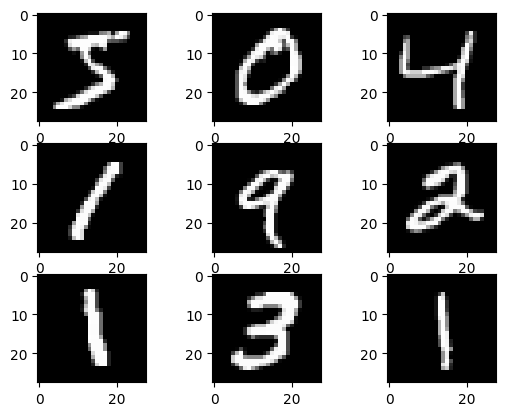

In [8]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#### Preprocessing

##### Reshape the dataset 28*28 to 784 

In [9]:
X_train = X_train.reshape((-1, X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((-1, X_test.shape[1]*X_test.shape[2]))

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(X_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000, 784)


##### Feature Scaling

In [12]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_test).transform(X_test)

# Normalization
# from sklearn.preprocessing import Normalizer
# scaler2 = Normalizer()
# X_train_scaled = sclaer.fit(X_train).transform(X_train)
# X_test = scaler.fit(X_test).transform(X_test)


#### Split it into a training set, validation set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_scaled, y_train, random_state=42, test_size=1/6)

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_validation: ' + str(X_validation.shape))
print('Y_validation: ' + str(y_validation.shape))

X_train: (50000, 784)
Y_train: (50000,)
X_validation: (10000, 784)
Y_validation: (10000,)


### 2. Then train various classifiers: E.g. one Random Forest classifier, one Extra-Trees classifier, and one SVM classifier, etc.

#### Random Forest classifier

In [14]:
# training random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# precting the random forest
from sklearn.metrics import classification_report, confusion_matrix
pred=rf.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       984
           1       0.98      0.99      0.98      1093
           2       0.95      0.97      0.96       994
           3       0.97      0.95      0.96      1000
           4       0.96      0.97      0.97       980
           5       0.98      0.97      0.97       919
           6       0.98      0.98      0.98       981
           7       0.98      0.96      0.97      1060
           8       0.96      0.96      0.96       979
           9       0.96      0.95      0.96      1010

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Report
[[ 968    0    2    1    1    2    5    0    4    1]
 [   0 1078    8    1    2    0    1    1    1    1]
 [   2    6  968    3    4    0    1    5    4    1]
 [   3    0   14  954    1    9    1    3  

#### Extra-Trees classifier

In [16]:
# training extra-tree
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [17]:
# precting the random forest
from sklearn.metrics import classification_report, confusion_matrix
pred=et.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       984
           1       0.98      0.99      0.99      1093
           2       0.96      0.97      0.97       994
           3       0.98      0.96      0.97      1000
           4       0.97      0.97      0.97       980
           5       0.97      0.97      0.97       919
           6       0.98      0.98      0.98       981
           7       0.98      0.97      0.97      1060
           8       0.96      0.96      0.96       979
           9       0.95      0.96      0.96      1010

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Report
[[ 971    0    3    0    1    1    4    0    3    1]
 [   0 1079    6    2    1    0    1    1    1    2]
 [   1    5  968    1    3    2    2    6    5    1]
 [   3    0   16  956    0    7    0    3  

#### SVM Classifier

In [18]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [19]:
# precting the svm
from sklearn.metrics import classification_report, confusion_matrix
pred=svm.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.98      0.99      0.99      1093
           2       0.96      0.98      0.97       994
           3       0.98      0.96      0.97      1000
           4       0.97      0.98      0.98       980
           5       0.98      0.97      0.97       919
           6       0.99      0.99      0.99       981
           7       0.98      0.98      0.98      1060
           8       0.97      0.97      0.97       979
           9       0.98      0.96      0.97      1010

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Report
[[ 974    0    3    0    1    2    1    0    2    1]
 [   0 1083    5    1    1    0    0    0    1    2]
 [   0    3  978    1    3    0    0    5    3    1]
 [   1    1   13  961    0    9    0    1  

#### KNN Classifier

In [20]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
kVals = range(1, 30, 2)
accuracies = []

for k in kVals:
    # train the classifier with the current value of `k`
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    score = knn.score(X_validation, y_validation)
    accuracies.append(score)

i = np.argmax(accuracies)
knn = KNeighborsClassifier(n_neighbors=kVals[i])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# precting the knn
from sklearn.metrics import classification_report, confusion_matrix
pred=knn.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       984
           1       0.97      1.00      0.98      1093
           2       0.99      0.96      0.97       994
           3       0.97      0.97      0.97      1000
           4       0.97      0.97      0.97       980
           5       0.97      0.97      0.97       919
           6       0.98      0.99      0.99       981
           7       0.97      0.98      0.97      1060
           8       0.99      0.95      0.97       979
           9       0.97      0.96      0.96      1010

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Report
[[ 979    0    0    0    0    1    3    0    0    1]
 [   0 1089    2    0    0    0    0    2    0    0]
 [   5    5  958    3    1    2    1   12    6    1]
 [   0    0    6  971    0   11    0    2  

### Next, try to **combine these classifiers into an ensemble** that outperforms each individual classifier on the validation set, using **soft voting**. Once you have found one, try it on the test set.

In [21]:
from sklearn.ensemble import VotingClassifier
estimators = [
    ("random_forest", rf),
    ("extra_tress", et),
    ("svm", svm),
    ("knn", knn)
]

soft_voting_ensemble = VotingClassifier (estimators, voting="soft")
soft_voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('extra_tress', ExtraTreesClassifier(n_jobs=-1)),
                             ('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))],
                 voting='soft')

In [22]:
# precting the soft_voting_ensemble
from sklearn.metrics import classification_report, confusion_matrix
pred=soft_voting_ensemble.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       984
           1       0.98      1.00      0.99      1093
           2       0.98      0.98      0.98       994
           3       0.98      0.97      0.98      1000
           4       0.98      0.98      0.98       980
           5       0.98      0.98      0.98       919
           6       0.99      0.99      0.99       981
           7       0.98      0.98      0.98      1060
           8       0.99      0.97      0.98       979
           9       0.98      0.97      0.97      1010

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Report
[[ 976    0    1    0    1    1    2    0    1    2]
 [   0 1089    2    0    0    0    0    2    0    0]
 [   0    3  974    2    2    0    0    8    4    1]
 [   0    0    7  974    0    9    0    2  